In [6]:
import pandas as pd
import json
import numpy as np
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle

import intercoder_reliability_functions as fun

In [7]:
## load the data
Q1_df = pd.read_csv("output/Q1_df.csv", header=[0, 1], index_col=0)
Q2_df = pd.read_csv("output/Q2_df.csv", header=[0, 1], index_col=0)
Q3_df = pd.read_csv("output/Q3_df.csv", header=[0, 1], index_col=0)


# Load lists from the output directory
with open("output/Q1_choices.pkl", "rb") as f:
    Q1_choices = pickle.load(f)

with open("output/Q2_choices.pkl", "rb") as f:
    Q2_choices = pickle.load(f)

with open("output/Q3_choices.pkl", "rb") as f:
    Q3_choices = pickle.load(f)

# Load the pickle file (nb: pre-run on Dobby)
with open('input/alpha_samples.pkl', 'rb') as f:
    alpha_samples = pickle.load(f)

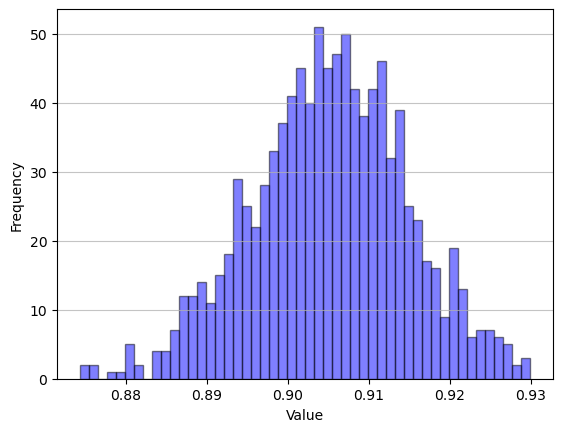

Q1
Mean: 0.9050618595127117
95% Confidence Interval: (0.8861641638384582, 0.9239595551869652)


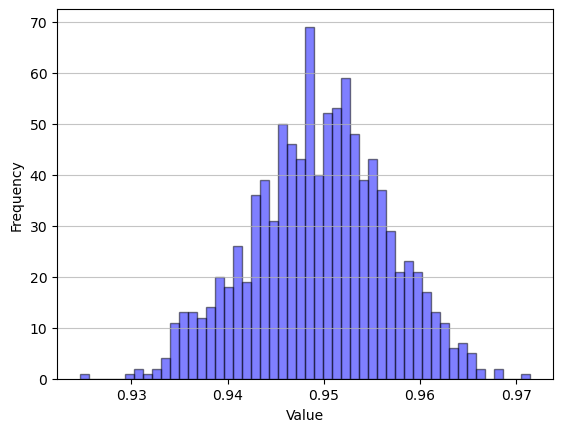

Q2
Mean: 0.9494870912979673
95% Confidence Interval: (0.9356071568839839, 0.9633670257119507)


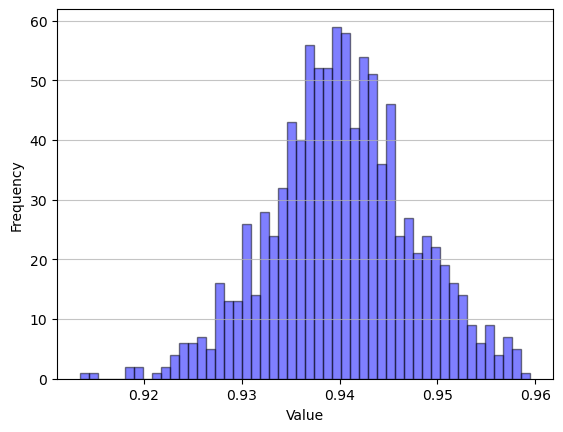

Q3
Mean: 0.9401791956325283
95% Confidence Interval: (0.925897745522808, 0.9544606457422485)


In [8]:
## Compute Krippendorff's alpha and load bootstrapping samples
coincidence_matrix_Q1=fun.compute_coincidence_matrix(Q1_choices,Q1_df)
coincidence_matrix_Q2=fun.compute_coincidence_matrix(Q2_choices,Q2_df)
coincidence_matrix_Q3=fun.compute_coincidence_matrix(Q3_choices,Q3_df)

Q1_alpha=fun.alpha(coincidence_matrix_Q1)
Q2_alpha=fun.alpha(coincidence_matrix_Q2)
Q3_alpha=fun.alpha(coincidence_matrix_Q3)


(num_samples, x)=np.shape(alpha_samples)
np.shape(alpha_samples)
for i in range(3):
    sample_to_plot=alpha_samples[:,i]

    # Remove NaN values from alpha_samples
    sample_to_plot = sample_to_plot[~np.isnan(sample_to_plot)]
    # Remove values greater than 1 from alpha_samples
    # alpha_samples = alpha_samples[alpha_samples <= 1]
    # alpha_samples = alpha_samples[alpha_samples >= 0]

    # Plot the histogram
    plt.hist(sample_to_plot, bins=50, alpha=0.5, color='blue', edgecolor='black')
    # plt.title('Q1 samples')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Compute mean and standard error
    mean = np.mean(sample_to_plot)
    std_error = np.std(sample_to_plot, ddof=num_samples-1) / np.sqrt(len(sample_to_plot))  # ddof=1 for sample standard deviation

    # Compute 95% Confidence Interval
    confidence_interval = stats.t.interval(0.95, len(sample_to_plot)-1, loc=mean, scale=std_error)

    # timestamp = datetime.now().strftime("%Y%m%d")

    # # Specify the filename
    # filename = 'Q'+str(i+1)+'_'+str(num_samples)+'_samples_'+str(timestamp)+'.txt'

    # # Open the file in write mode ('w') and write the statement to it
    # with open(filename, 'w') as file:
    #     file.write('Q'+str(i+1)+ f"\n Mean: {mean}" +f"\n 95% Confidence Interval: {confidence_interval}")
    print('Q'+str(i+1))
    print(f"Mean: {mean}")
    print(f"95% Confidence Interval: {confidence_interval}")
